# Greetings

Hi! This notebook will show you how to prepare the dataset before giving it to the recommender. There are several parts to do so.
1. <b> Data Preprocessing </b> <br>
Prepare the data and label some of the foods based on its name.
2. <b> Split Labeled and Unlabeled Data </b>
3. <b> Create a Model </b> <br>
Train and test the suggested model using only the labeled data to check how it works.
4. <b> Model Training with All Labeled Data </b>
5. <b> Label The Unlabeled Data </b>
6. <b> Combine All Data and Export It </b>

I suggest that you read this notebook along side with the slides to give a better understanding on what I did.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Preprocessing

In [2]:
raw_data = pd.read_csv("RAW_recipes.csv")
raw_data.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


We will not use all of the columns. Let's take only the name and the ingredients of the foods. Make sure to drop the null values.

In [3]:
used_data = raw_data[["name", "ingredients"]].dropna().reset_index(drop = True)
used_data.head()

,name,ingredients
0,arriba baked winter squash mexican style,"['winter squash', 'mexican seasoning', 'mixed ..."
1,a bit different breakfast pizza,"['prepared pizza crust', 'sausage patty', 'egg..."
2,all in the kitchen chili,"['ground beef', 'yellow onions', 'diced tomato..."
3,alouette potatoes,"['spreadable cheese with garlic and herbs', 'n..."
4,amish tomato ketchup for canning,"['tomato juice', 'apple cider vinegar', 'sugar..."


Next, we will map each food to its taste vector representation based on its name. For example, sweet and sour food will be representated as [1 0 1 0 0].

In [4]:
def get_taste(x):
    tastes = ["sweet", "salty", "sour", "bitter", "spicy"]
    taste_result = []
    
    for taste in tastes:
        if taste in x:
            taste_result.append(1)
        else:
            taste_result.append(0)
    
    return taste_result

used_data["taste"] = used_data["name"].map(get_taste)
used_data.head()

,name,ingredients,taste
0,arriba baked winter squash mexican style,"['winter squash', 'mexican seasoning', 'mixed ...","[0, 0, 0, 0, 0]"
1,a bit different breakfast pizza,"['prepared pizza crust', 'sausage patty', 'egg...","[0, 0, 0, 0, 0]"
2,all in the kitchen chili,"['ground beef', 'yellow onions', 'diced tomato...","[0, 0, 0, 0, 0]"
3,alouette potatoes,"['spreadable cheese with garlic and herbs', 'n...","[0, 0, 0, 0, 0]"
4,amish tomato ketchup for canning,"['tomato juice', 'apple cider vinegar', 'sugar...","[0, 0, 0, 0, 0]"


Hmm... The result above is not quite informative. Let's see if we can find a better taste.

In [5]:
used_data[~used_data["taste"].isin([[0, 0, 0, 0, 0]])].head()

,name,ingredients,taste
88,souper easy sweet sour meatballs,"['ground beef', 'dried breadcrumbs', 'onion', ...","[1, 0, 1, 0, 0]"
89,sour cream avocado dip vegan,"['soft silken tofu', 'avocado', 'chunky salsa'...","[0, 0, 1, 0, 0]"
90,spicy banana bread,"['shortening', 'white sugar', 'bananas', 'eggs...","[0, 0, 0, 0, 1]"
276,slightly spicy black bean burgers,"['black beans', 'oil', 'frozen corn', 'garlic'...","[0, 0, 0, 0, 1]"
297,windy s sweet and sour meatballs,"['lean ground beef', 'eggs', 'salt', 'black pe...","[1, 0, 1, 0, 0]"


It seems our function works well. But, it's still not quite informative. Let's convert the taste vector into its name.

In [6]:
def get_taste_name(x):
    tastes = ["sweet", "salty", "sour", "bitter", "spicy"]
    taste_result = []
    
    for i in range(5):
        if x[i] == 1:
            taste_result.append(tastes[i])

    return str(taste_result)

used_data["taste_name"] = used_data["taste"].map(get_taste_name)
used_data.head()

,name,ingredients,taste,taste_name
0,arriba baked winter squash mexican style,"['winter squash', 'mexican seasoning', 'mixed ...","[0, 0, 0, 0, 0]",[]
1,a bit different breakfast pizza,"['prepared pizza crust', 'sausage patty', 'egg...","[0, 0, 0, 0, 0]",[]
2,all in the kitchen chili,"['ground beef', 'yellow onions', 'diced tomato...","[0, 0, 0, 0, 0]",[]
3,alouette potatoes,"['spreadable cheese with garlic and herbs', 'n...","[0, 0, 0, 0, 0]",[]
4,amish tomato ketchup for canning,"['tomato juice', 'apple cider vinegar', 'sugar...","[0, 0, 0, 0, 0]",[]


In [7]:
used_data[used_data["taste_name"] != "[]"].head()

,name,ingredients,taste,taste_name
88,souper easy sweet sour meatballs,"['ground beef', 'dried breadcrumbs', 'onion', ...","[1, 0, 1, 0, 0]","['sweet', 'sour']"
89,sour cream avocado dip vegan,"['soft silken tofu', 'avocado', 'chunky salsa'...","[0, 0, 1, 0, 0]",['sour']
90,spicy banana bread,"['shortening', 'white sugar', 'bananas', 'eggs...","[0, 0, 0, 0, 1]",['spicy']
276,slightly spicy black bean burgers,"['black beans', 'oil', 'frozen corn', 'garlic'...","[0, 0, 0, 0, 1]",['spicy']
297,windy s sweet and sour meatballs,"['lean ground beef', 'eggs', 'salt', 'black pe...","[1, 0, 1, 0, 0]","['sweet', 'sour']"


Great! But the brackets are annoying. Let's remove them.

In [8]:
for i in ["ingredients", "taste_name"]:
    used_data[i] = used_data[i].map(lambda x: x.replace("[", "").replace("]", "").replace("'", ""))
used_data.head()

,name,ingredients,taste,taste_name
0,arriba baked winter squash mexican style,"winter squash, mexican seasoning, mixed spice,...","[0, 0, 0, 0, 0]",
1,a bit different breakfast pizza,"prepared pizza crust, sausage patty, eggs, mil...","[0, 0, 0, 0, 0]",
2,all in the kitchen chili,"ground beef, yellow onions, diced tomatoes, to...","[0, 0, 0, 0, 0]",
3,alouette potatoes,"spreadable cheese with garlic and herbs, new p...","[0, 0, 0, 0, 0]",
4,amish tomato ketchup for canning,"tomato juice, apple cider vinegar, sugar, salt...","[0, 0, 0, 0, 0]",


Much better! Let's see the distribution of each taste.

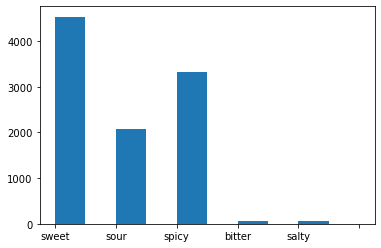

In [9]:
str_tastes = ""
for i in range(len(used_data)):
    if used_data["taste_name"][i] != "":
        if i == len(used_data) - 1:
            str_tastes += used_data["taste_name"][i]
        else:
            str_tastes += used_data["taste_name"][i] + ", "

all_tastes = str_tastes.split(", ")
plt.hist(all_tastes)
plt.show()

It's common to name a food with "sweet", "sour", or "spicy". But, it's quite surprising that there are some foods with "bitter" and "salty" on its name. Well, at least we have some data about bitter and salty foods.

# Split Labeled and Unlabeled Data

In [10]:
labeled_data = used_data[used_data["taste_name"] != ""].reset_index(drop = True)
unlabeled_data = used_data[used_data["taste_name"] == ""].reset_index(drop = True)

In [11]:
labeled_data.head()

,name,ingredients,taste,taste_name
0,souper easy sweet sour meatballs,"ground beef, dried breadcrumbs, onion, eggs, t...","[1, 0, 1, 0, 0]","sweet, sour"
1,sour cream avocado dip vegan,"soft silken tofu, avocado, chunky salsa, fresh...","[0, 0, 1, 0, 0]",sour
2,spicy banana bread,"shortening, white sugar, bananas, eggs, flour,...","[0, 0, 0, 0, 1]",spicy
3,slightly spicy black bean burgers,"black beans, oil, frozen corn, garlic, onion, ...","[0, 0, 0, 0, 1]",spicy
4,windy s sweet and sour meatballs,"lean ground beef, eggs, salt, black pepper, on...","[1, 0, 1, 0, 0]","sweet, sour"


In [12]:
unlabeled_data.head()

,name,ingredients,taste,taste_name
0,arriba baked winter squash mexican style,"winter squash, mexican seasoning, mixed spice,...","[0, 0, 0, 0, 0]",
1,a bit different breakfast pizza,"prepared pizza crust, sausage patty, eggs, mil...","[0, 0, 0, 0, 0]",
2,all in the kitchen chili,"ground beef, yellow onions, diced tomatoes, to...","[0, 0, 0, 0, 0]",
3,alouette potatoes,"spreadable cheese with garlic and herbs, new p...","[0, 0, 0, 0, 0]",
4,amish tomato ketchup for canning,"tomato juice, apple cider vinegar, sugar, salt...","[0, 0, 0, 0, 0]",


# Create a Model

In this section, we just want to check whether our method will work. That's why we will only use labeled data.

Let's split the labeled data into training and testing data. We will take 80% for the training data and the rest is for the testing data.

In [13]:
sampling_data = labeled_data.sample(frac = 1, ignore_index = True)
train_data = sampling_data[0:int(len(labeled_data)*0.8)]
test_data = sampling_data[int(len(labeled_data)*0.8):].reset_index(drop = True)

In [14]:
train_data.head()

,name,ingredients,taste,taste_name
0,sweet butternut casserole,"leeks, butternut squash, sweet potatoes, chopp...","[1, 0, 0, 0, 0]",sweet
1,cilantro chicken and spicy thai noodles,"chicken thighs, canola oil, salt & freshly gro...","[0, 0, 0, 0, 1]",spicy
2,succulent sour cream pot roast,"boneless beef chuck roast, unbleached flour, c...","[0, 0, 1, 0, 0]",sour
3,sweet and spicy kielbasa saute,"kielbasa, taco seasoning mix, tomatoes, peach ...","[1, 0, 0, 0, 1]","sweet, spicy"
4,sweet potato cheese ball,"cream cheese, mashed sweet potatoes, onion, ja...","[1, 0, 0, 0, 0]",sweet


In [15]:
test_data.head()

,name,ingredients,taste,taste_name
0,sour cream breakfast casserole,"breakfast sausage, sour cream, eggs, shredded ...","[0, 0, 1, 0, 0]",sour
1,spicy garlic mayonnaise,"pimiento, garlic cloves, egg yolks, olive oil,...","[0, 0, 0, 0, 1]",spicy
2,szechuan noodles with spicy beef sauce,"ground beef, onions, garlic, fresh ginger, dry...","[0, 0, 0, 0, 1]",spicy
3,thai spicy basil chicken fried rice,"oyster sauce, fish sauce, soy sauce, white sug...","[0, 0, 0, 0, 1]",spicy
4,easy spicy chicken enchiladas,"boneless skinless chicken breasts, salsa, chee...","[0, 0, 0, 0, 1]",spicy


Now, we want to get the list of all unique ingredients in the data. The idea is, we will first concatenate all of the ingredients into a string. Then, we will split the string for every comma (, ) appeared. Finally, convert the <b>list</b> of ingredients into the <b>set</b> of ingredients to remove the duplicate names. To make it more readable next time, let's just convert it back to <b>list</b>. :D

In [16]:
str_ingredients = ""
for i in range(len(train_data)):
    if i == len(train_data) - 1:
        str_ingredients += train_data["ingredients"][i]
    else:
        str_ingredients += train_data["ingredients"][i] + ", "

all_ingredients = str_ingredients.split(", ")
all_unique_ingredients = list(set(all_ingredients))
all_unique_ingredients[0:5]

['dried anchovies',
 'cranberries',
 'evaporated skim milk',
 'lamb backstraps',
 'ground beef']

We've finally arrived on the main part. I suggest that you read the slide first for this part.

To calculate the probability of the ingredient's taste, we will first count the food which uses that ingredient and also its taste. The counting can be done efficiently by summing the taste vector.

For example, foods that uses ingredient $x$ are food $A, B,$ and $C$, with respective taste vectors [1 0 1 0 0], [0 1 1 0 0], and [1 0 0 0 1]. If we sum those vectors, we will get [2 1 2 0 1]. So, the probability that ingredient $x$ is sweet is 
$$P(f(x) = sweet) = \frac{2}{2+1+2+0+1} = \frac{1}{3}.$$

In [17]:
prob_vectors = []
for ingredient in all_unique_ingredients:
    count_taste = np.zeros(5, dtype = int)
    for row in range(len(train_data)):
        if ingredient in train_data["ingredients"][row]:
            count_taste += np.array(train_data["taste"][row])
    
    prob_vector = []
    for i in count_taste:
        prob_vector.append(i/sum(count_taste))
    
    prob_vectors.append(np.array(prob_vector))

In [18]:
prob_vectors[0:5]

[array([1., 0., 0., 0., 0.]),
 array([0.70731707, 0.01219512, 0.15853659, 0.02439024, 0.09756098]),
 array([0.5, 0. , 0.5, 0. , 0. ]),
 array([0., 0., 1., 0., 0.]),
 array([0.26907631, 0.        , 0.28915663, 0.        , 0.44176707])]

After we train the model, let's classify the foods from testing data. We just need to sum the taste vector of each ingredient in that food and then decide the taste.

In [19]:
def classify_taste(ingredients):
    ingredients = ingredients.split(", ")
    total_prob = np.zeros(5)
    for ingredient in ingredients:
        if ingredient in all_unique_ingredients:
            total_prob += prob_vectors[all_unique_ingredients.index(ingredient)]
    
    taste = [0, 0, 0, 0, 0]
    if sum(total_prob) != 0:
        for i in range(5):
            if total_prob[i]/sum(total_prob) >= 1/5:
                taste[i] = 1
                
    return taste

In [20]:
test_data["taste_pred"] = test_data["ingredients"].map(classify_taste)
test_data["taste_pred_name"] = test_data["taste_pred"].map(get_taste_name)
test_data.head()

,name,ingredients,taste,taste_name,taste_pred,taste_pred_name
0,sour cream breakfast casserole,"breakfast sausage, sour cream, eggs, shredded ...","[0, 0, 1, 0, 0]",sour,"[1, 0, 1, 0, 1]","['sweet', 'sour', 'spicy']"
1,spicy garlic mayonnaise,"pimiento, garlic cloves, egg yolks, olive oil,...","[0, 0, 0, 0, 1]",spicy,"[1, 0, 0, 0, 1]","['sweet', 'spicy']"
2,szechuan noodles with spicy beef sauce,"ground beef, onions, garlic, fresh ginger, dry...","[0, 0, 0, 0, 1]",spicy,"[1, 0, 0, 0, 1]","['sweet', 'spicy']"
3,thai spicy basil chicken fried rice,"oyster sauce, fish sauce, soy sauce, white sug...","[0, 0, 0, 0, 1]",spicy,"[1, 0, 0, 0, 1]","['sweet', 'spicy']"
4,easy spicy chicken enchiladas,"boneless skinless chicken breasts, salsa, chee...","[0, 0, 0, 0, 1]",spicy,"[1, 0, 1, 0, 1]","['sweet', 'sour', 'spicy']"


In [21]:
count_true_pred = 0
count_false_pred = 0

for row in range(len(test_data)):
    taste = np.array(test_data["taste"][row])
    taste_pred = np.array(test_data["taste_pred"][row])
    count_true_pred += np.dot(taste, taste_pred)
    count_false_pred += sum(abs(taste - taste_pred))

print("Correct prediction =", count_true_pred)
print("Wrong prediction =", count_false_pred)

Correct prediction = 1905
Wrong prediction = 2204


# Train Model with All Labeled Data

In [22]:
str_ingredients = ""
for i in range(len(labeled_data)):
    if i == len(labeled_data) - 1:
        str_ingredients += labeled_data["ingredients"][i]
    else:
        str_ingredients += labeled_data["ingredients"][i] + ", "

all_ingredients = str_ingredients.split(", ")
all_unique_ingredients = list(set(all_ingredients))
all_unique_ingredients[0:5]

['dried anchovies',
 'cranberries',
 'evaporated skim milk',
 'bread enhancer',
 'ground beef']

In [23]:
prob_vectors = []
for ingredient in all_unique_ingredients:
    count_taste = np.zeros(5, dtype = int)
    for row in range(len(labeled_data)):
        if ingredient in labeled_data["ingredients"][row]:
            count_taste += np.array(labeled_data["taste"][row])
    
    prob_vector = []
    for i in count_taste:
        prob_vector.append(i/sum(count_taste))
    
    prob_vectors.append(np.array(prob_vector))

In [24]:
prob_vectors[0:5]

[array([1., 0., 0., 0., 0.]),
 array([0.70588235, 0.01960784, 0.16666667, 0.01960784, 0.08823529]),
 array([0.5, 0. , 0.5, 0. , 0. ]),
 array([0., 0., 1., 0., 0.]),
 array([0.26779661, 0.        , 0.28474576, 0.        , 0.44745763])]

# Label The Unlabeled Data

In [25]:
unlabeled_data["taste"] = unlabeled_data["ingredients"].map(classify_taste)
unlabeled_data["taste_name"] = unlabeled_data["taste"].map(get_taste_name)
unlabeled_data.head()

,name,ingredients,taste,taste_name
0,arriba baked winter squash mexican style,"winter squash, mexican seasoning, mixed spice,...","[1, 0, 0, 0, 1]","['sweet', 'spicy']"
1,a bit different breakfast pizza,"prepared pizza crust, sausage patty, eggs, mil...","[1, 0, 0, 0, 1]","['sweet', 'spicy']"
2,all in the kitchen chili,"ground beef, yellow onions, diced tomatoes, to...","[1, 0, 0, 0, 1]","['sweet', 'spicy']"
3,alouette potatoes,"spreadable cheese with garlic and herbs, new p...","[1, 0, 1, 0, 1]","['sweet', 'sour', 'spicy']"
4,amish tomato ketchup for canning,"tomato juice, apple cider vinegar, sugar, salt...","[1, 0, 1, 0, 1]","['sweet', 'sour', 'spicy']"


# Combine Labeled and Unlabeled Data

In [26]:
unlabeled_data["taste_name"] = unlabeled_data["taste_name"].map(lambda x: x.replace("[", "").replace("]", "").replace("'", ""))
unlabeled_data.head()

,name,ingredients,taste,taste_name
0,arriba baked winter squash mexican style,"winter squash, mexican seasoning, mixed spice,...","[1, 0, 0, 0, 1]","sweet, spicy"
1,a bit different breakfast pizza,"prepared pizza crust, sausage patty, eggs, mil...","[1, 0, 0, 0, 1]","sweet, spicy"
2,all in the kitchen chili,"ground beef, yellow onions, diced tomatoes, to...","[1, 0, 0, 0, 1]","sweet, spicy"
3,alouette potatoes,"spreadable cheese with garlic and herbs, new p...","[1, 0, 1, 0, 1]","sweet, sour, spicy"
4,amish tomato ketchup for canning,"tomato juice, apple cider vinegar, sugar, salt...","[1, 0, 1, 0, 1]","sweet, sour, spicy"


In [27]:
unlabeled_data = unlabeled_data[unlabeled_data["taste_name"] != ""]
unlabeled_data.head()

,name,ingredients,taste,taste_name
0,arriba baked winter squash mexican style,"winter squash, mexican seasoning, mixed spice,...","[1, 0, 0, 0, 1]","sweet, spicy"
1,a bit different breakfast pizza,"prepared pizza crust, sausage patty, eggs, mil...","[1, 0, 0, 0, 1]","sweet, spicy"
2,all in the kitchen chili,"ground beef, yellow onions, diced tomatoes, to...","[1, 0, 0, 0, 1]","sweet, spicy"
3,alouette potatoes,"spreadable cheese with garlic and herbs, new p...","[1, 0, 1, 0, 1]","sweet, sour, spicy"
4,amish tomato ketchup for canning,"tomato juice, apple cider vinegar, sugar, salt...","[1, 0, 1, 0, 1]","sweet, sour, spicy"


In [28]:
complete_data = pd.concat([labeled_data, unlabeled_data]).reset_index(drop = True)
complete_data.head()

,name,ingredients,taste,taste_name
0,souper easy sweet sour meatballs,"ground beef, dried breadcrumbs, onion, eggs, t...","[1, 0, 1, 0, 0]","sweet, sour"
1,sour cream avocado dip vegan,"soft silken tofu, avocado, chunky salsa, fresh...","[0, 0, 1, 0, 0]",sour
2,spicy banana bread,"shortening, white sugar, bananas, eggs, flour,...","[0, 0, 0, 0, 1]",spicy
3,slightly spicy black bean burgers,"black beans, oil, frozen corn, garlic, onion, ...","[0, 0, 0, 0, 1]",spicy
4,windy s sweet and sour meatballs,"lean ground beef, eggs, salt, black pepper, on...","[1, 0, 1, 0, 0]","sweet, sour"


In [29]:
complete_data = complete_data.drop(columns = "taste")
complete_data.rename(columns = {"taste_name": "taste"}, inplace = True)
complete_data.head()

,name,ingredients,taste
0,souper easy sweet sour meatballs,"ground beef, dried breadcrumbs, onion, eggs, t...","sweet, sour"
1,sour cream avocado dip vegan,"soft silken tofu, avocado, chunky salsa, fresh...",sour
2,spicy banana bread,"shortening, white sugar, bananas, eggs, flour,...",spicy
3,slightly spicy black bean burgers,"black beans, oil, frozen corn, garlic, onion, ...",spicy
4,windy s sweet and sour meatballs,"lean ground beef, eggs, salt, black pepper, on...","sweet, sour"


# Export Data

In [30]:
complete_data.to_csv("Food Taste.csv", index = False)